# Linear regresion of customer amount spent on online shopping of clothes
## Dataset-Kagggle

Import different model 


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import file 

In [70]:
df=pd.read_csv('Ecommerce Customers')

Display data for understanding the data 


Display size and details of data 

In [71]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [73]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


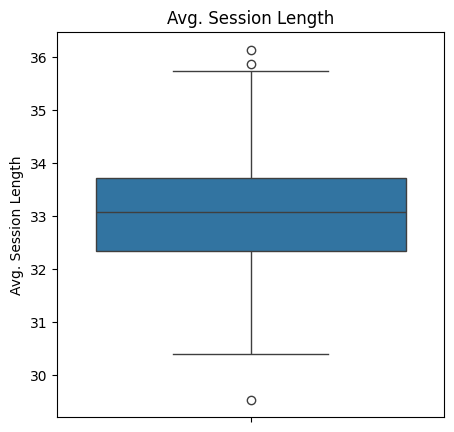

In [74]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Avg. Session Length'])
plt.title('Avg. Session Length')
plt.show()

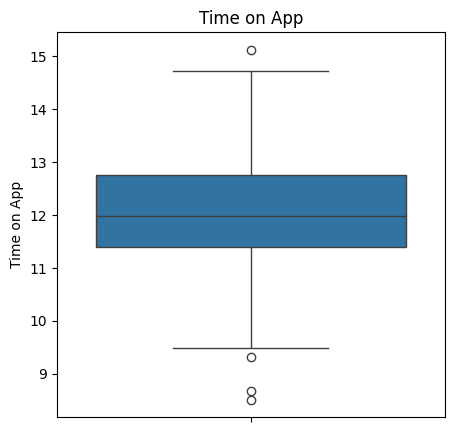

In [75]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Time on App'])
plt.title('Time on App')
plt.show()

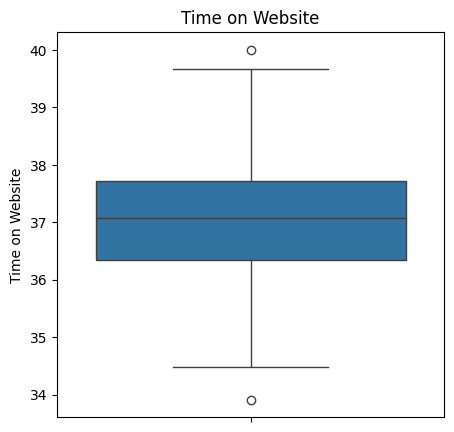

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Time on Website'])
plt.title('Time on Website')
plt.show()

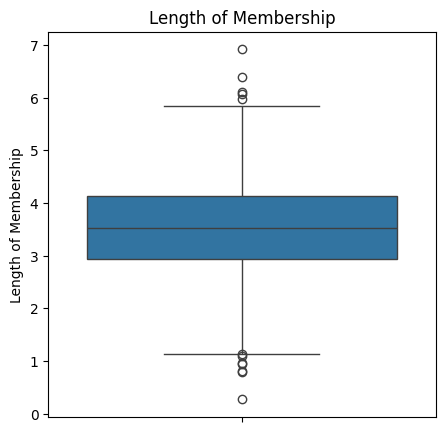

In [77]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Length of Membership'])
plt.title('Length of Membership')
plt.show()

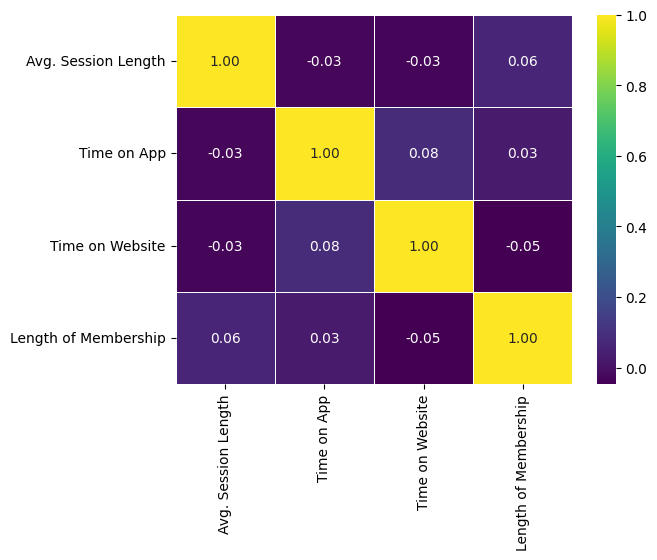

In [78]:
selected_col=['Avg. Session Length','Time on App','Time on Website','Length of Membership']
df_subset=df[selected_col]
correlation_matirx=df_subset.corr()
plt.Figure(figsize=(5,5))
sns.heatmap(
            correlation_matirx,
            annot=True,
            cmap='viridis',
            fmt=".2f",
            linewidths=.5
            )
plt.show()

Fearture selection using forward method 

In [79]:
Label='Yearly Amount Spent'
to_drop=['Email','Address','Avatar']
feature= [column for column in df.columns]
x,y=df[feature],df[Label]
x=x.drop(to_drop,axis=1)
x=x.drop(Label,axis=1)
x


,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


Split data in traing and test data set 

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Do feature selection 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
Lr=LinearRegression()

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import  SequentialFeatureSelector
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr,
                                n_features_to_select='auto', 
                                direction='forward',
                                scoring='neg_mean_squared_error', 
                                cv=5)
sfs.fit(X_train, y_train)
selected_features = X_train.columns[sfs.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Time on App', 'Length of Membership']


Out four only two got selected. Need to train model on those features

In [104]:
X_train_transformed= sfs.transform(X_train)
X_test_trasnformed= sfs.transform(X_test)
fianlModel=LinearRegression()
fianlModel.fit(X_train_transformed,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
fianlModel.coef_
NDF=pd.DataFrame(fianlModel.coef_ , selected_features,columns=['Coef'] )
print(NDF)

                           Coef
Time on App           38.052298
Length of Membership  62.745878
